Files already downloaded and verified
Files already downloaded and verified
获取一些随机训练数据


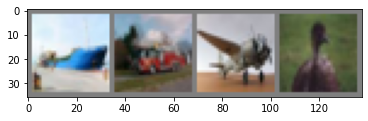

 ship truck plane  bird
**********************
starting Trating
[1,  2000] loss: 0.336
[1,  4000] loss: 0.379
[1,  6000] loss: 0.397
[1,  8000] loss: 0.389
[1, 10000] loss: 0.411
[1, 12000] loss: 0.416
Finished Training
**********************
Time taken: 0:01:19.921137
***************************
获取一些随机测试数据
Predicted:    cat  ship  ship  ship
**********************
输出训练得到的准确度
Accuracy of the network on the 10000 test images: 66 %
Accuracy of plane : 67 %
Accuracy of   car : 75 %
Accuracy of  bird : 56 %
Accuracy of   cat : 55 %
Accuracy of  deer : 59 %
Accuracy of   dog : 52 %
Accuracy of  frog : 73 %
Accuracy of horse : 69 %
Accuracy of  ship : 79 %
Accuracy of truck : 75 %


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from datetime import datetime

PATH = './cifar_net.pth'  # 保存模型地址

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("获取一些随机训练数据")
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
print("**********************")


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 100, 5) # 尝试改变第二个(网络的width)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(100, 16, 5) # 第一个值和上面第二个值一样
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))


# 训练
print("starting Trating")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

startTime = datetime.now()
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
    
        inputs, labels = data[0].to(device), data[1].to(device)
    
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

torch.save(net.state_dict(), PATH)

print('Finished Training')

print("**********************")
print("Time taken:", datetime.now() - startTime)
print("***************************")



#获取一些随机测试数据
print("获取一些随机测试数据")
dataiter = iter(testloader)
images, labels = dataiter.next()

# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 恢复模型并测试
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
print("**********************")
print("输出训练得到的准确度")
# 输出训练得到的准确度
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))